In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import string

In [6]:
df = pd.read_csv('Language Detection.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [7]:
def remove_pun(text):
    for pun in string.punctuation:
        text = text.replace(pun,"")
    text = text.lower()
    return text

In [8]:
df['Text'].apply(remove_pun)

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4        1 the word nature is borrowed from the old fre...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [9]:
X=df.iloc[:,0].values
Y=df.iloc[:,-1].values
print(X)
print(Y)

[' Nature, in the broadest sense, is the natural, physical, material world or universe.'
 '"Nature" can refer to the phenomena of the physical world, and also to life in general.'
 'The study of nature is a large, if not the only, part of science.' ...
 "ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್ಲವನ್ನೂ ಹೇಳಿದೆ ಮತ್ತು ಅವಳು ಆ ಸಮಯದಿಂದ ತುಂಬಾ ಬದಲಾಗಿದ್ದಾಳೆ."
 'ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ನಾನು ess ಹಿಸಿದ್ದೇನೆ.'
 'ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣುತ್ತಿದ್ದೀರಿ ಆದರೆ ನಾನು ಏನು ನೋಡುತ್ತಿದ್ದೇನೆ ನೀವು ಹೇಗೆ ಅವನಾಗಬಹುದು ನೀವು ಇಬ್ಬರು ತುಂಬಾ ಒಳ್ಳೆಯವರು']
['English' 'English' 'English' ... 'Kannada' 'Kannada' 'Kannada']


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

["There are concerns among health care professionals that these systems might not be designed in the public's interest but as income-generating machines."
 'yeterince teşekkür edemem Mühim değil.'
 'hatte so kleine Augen fast wie die eines Vogels und der andere hatte eine riesige Nase, ich würde nicht in seiner Nähe sein wollen.'
 ...
 've benimle evlenmek istediğini, altın bir vagonla geldiğini ve tepeden tırnağa altın giyinmiş olduğunu ve ne aptalca bir rüya olduğunu söyledi.'
 'क्या आपको पता होगा कि पुस्तकालय कहाँ है?'
 'അതുകൊണ്ട്\u200c, ന്യൂപീഡിയയെ സഹായിക്കാനായി പൊതുജനങ്ങൾക്കെല്ലാം ഒരു പോലെ എഡിറ്റ് ചെയ്യാനാവുന്ന വിക്കിപീഡിയ എന്ന സംരംഭം ജിമ്മി വെയിൽ\u200cസും സഹായി ലാരി സാങറും ചേർന്ന് ആരംഭിച്ചു.']
['[354][355][356] They used PageRank "followed by the number of appearances in the 24 different language editions of Wikipedia (descending order) and the century in which they were founded (ascending order)".'
 'Sie könnten träge sein oder meine Füße ziehen, also waren das die 10 klugen Wör

In [11]:
from sklearn import feature_extraction

In [12]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2),analyzer='char')

In [17]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2),analyzer='char')

In [13]:
from sklearn import linear_model
from sklearn import pipeline

In [14]:
mod_p=pipeline.Pipeline([('vec',vec),('clf',linear_model.LogisticRegression())])

In [15]:
mod_p.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [16]:
y_pred=mod_p.predict(X_test)

In [20]:
from sklearn import metrics
t1=metrics.accuracy_score(Y_test, y_pred)
print(t1)
cm=metrics.confusion_matrix(Y_test, y_pred)

0.9771760154738878


In [18]:
user_input = input("Enter a text: ")
output = mod_p.predict([user_input])
print("Predicted class:", output)

Enter a text: वह जयपुर गया
Predicted class: ['Hindi']


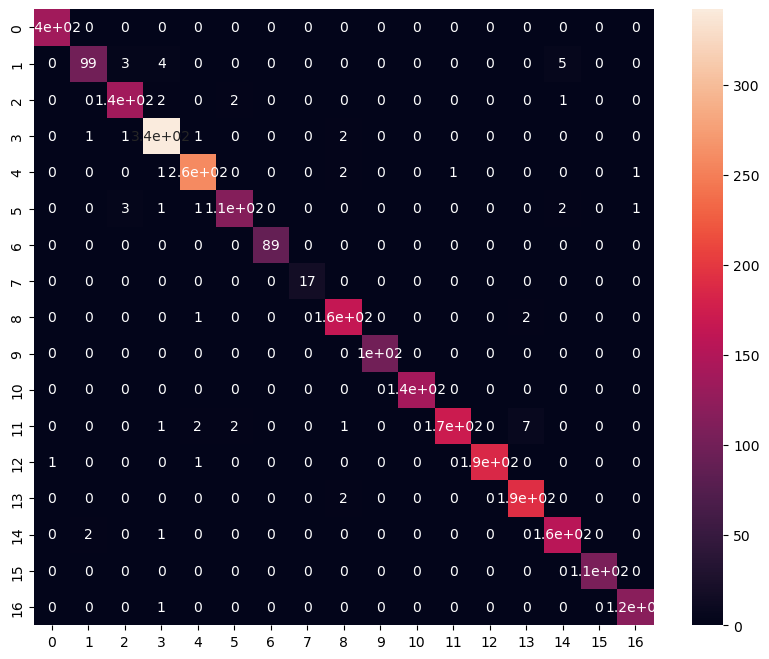

In [21]:
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(cm, annot=True)  # Plot the heatmap with annotations
plt.show()  # Show the plot